In [1]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file
try:
    df = pd.read_excel('/healthcare.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: '/healthcare.xlsx' not found. Please replace it with the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Patient_ID,Age,Weight,Height,Cholesterol,Blood_Sugar,Session_Duration,Step_Count,Pain_Level,Diagnosis,Smoking_Status,Blood_Type,City,Insurance_Provider,Hospital_ID,Target_Condition,Insurance_Claimed,Survival_Chance
0,6fe8b4bf-d209-4a77-8933-b217ae2a12c1,57,147.2,168.5,100.0,50.0,19.3,20636,Mild,Cancer,Former,O,Kolkata,Provider_84,HOSP_0375,Deceased,1,65.41
1,202fdbc9-5b71-4133-9266-a97de56263bb,47,100.1,167.8,185.6,82.2,57.8,18808,Moderate,Heart Disease,Current,A,Bangalore,Provider_157,HOSP_0029,Deceased,0,100.00
2,2fd7ce5e-f211-47a5-8a58-3940b8d6f277,59,166.4,155.6,154.2,109.7,18.9,19568,Moderate,Cancer,Never,AB,Kolkata,Provider_125,HOSP_0402,Critical,0,100.00
3,92de8e6c-6a69-4bbc-99f3-4f38009c6754,72,171.6,170.8,125.5,115.8,5.0,21638,Mild,Diabetes,Never,AB,Chennai,Provider_12,HOSP_0487,Stable,0,92.34
4,39810fe5-781e-43aa-9274-3c6878e4434f,46,55.0,150.1,168.7,91.7,46.3,21655,Mild,Heart Disease,Never,B,Delhi,Provider_180,HOSP_0393,Recovered,0,81.22


In [2]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Patient_ID               0
Age                      0
Weight                   0
Height                 100
Cholesterol              0
Blood_Sugar              0
Session_Duration         0
Step_Count               0
Pain_Level            1058
Diagnosis             1968
Smoking_Status         100
Blood_Type               0
City                     0
Insurance_Provider     100
Hospital_ID              0
Target_Condition         0
Insurance_Claimed        0
Survival_Chance          0
dtype: int64

Missing values after cleaning:
Patient_ID            0
Age                   0
Weight                0
Height                0
Cholesterol           0
Blood_Sugar           0
Session_Duration      0
Step_Count            0
Pain_Level            0
Diagnosis             0
Smoking_Status        0
Blood_Type            0
City                  0
Insurance_Provider    0
Hospital_ID           0
Target_Condition      0
Insurance_Claimed     0
Survival_Chance       0
dtype

In [3]:
# Select categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(df_encoded.head())

DataFrame after one-hot encoding:


,Age,Weight,Height,Cholesterol,Blood_Sugar,Session_Duration,Step_Count,Insurance_Claimed,Survival_Chance,Patient_ID_0008a4fa-e844-476f-b882-19433e39b093,...,Hospital_ID_HOSP_0494,Hospital_ID_HOSP_0495,Hospital_ID_HOSP_0496,Hospital_ID_HOSP_0497,Hospital_ID_HOSP_0498,Hospital_ID_HOSP_0499,Hospital_ID_HOSP_0500,Target_Condition_Deceased,Target_Condition_Recovered,Target_Condition_Stable
0,57,147.2,168.5,100.0,50.0,19.3,20636,1,65.41,False,...,False,False,False,False,False,False,False,True,False,False
1,47,100.1,167.8,185.6,82.2,57.8,18808,0,100.00,False,...,False,False,False,False,False,False,False,True,False,False
2,59,166.4,155.6,154.2,109.7,18.9,19568,0,100.00,False,...,False,False,False,False,False,False,False,False,False,False
3,72,171.6,170.8,125.5,115.8,5.0,21638,0,92.34,False,...,False,False,False,False,False,False,False,False,False,True
4,46,55.0,150.1,168.7,91.7,46.3,21655,0,81.22,False,...,False,False,False,False,False,False,False,False,True,False


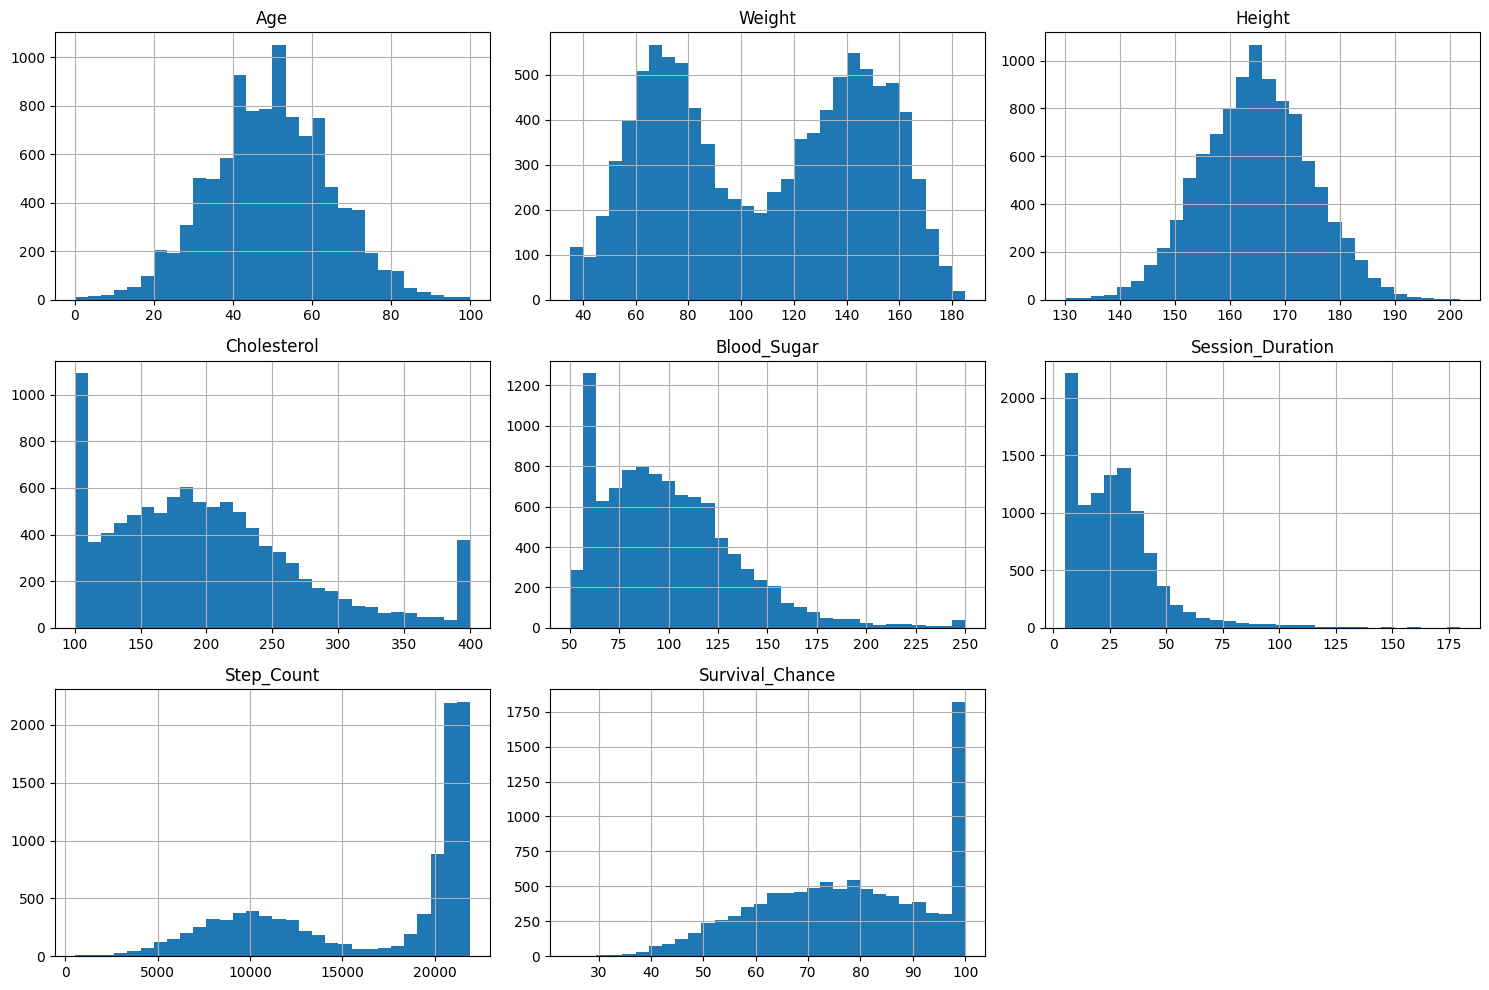

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few numerical columns for visualization
numerical_cols = ['Age', 'Weight', 'Height', 'Cholesterol', 'Blood_Sugar', 'Session_Duration', 'Step_Count', 'Survival_Chance']

# Create histograms for the selected numerical columns
df_encoded[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()